# Tomato Disease Classification

#### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

#### Import data into tensorflow dataset object
Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./PlantVillage/

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load dataset with ImageDataGenerator for augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    'datasplit/train',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse',
)

Found 12804 images belonging to 10 classes.


In [4]:
train_generator.class_indices

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.51742417 0.45860067 0.4782085 ]
  [0.5093951  0.4505716  0.47017944]
  [0.50136614 0.44254258 0.46215042]
  ...
  [0.52576506 0.46694157 0.4865494 ]
  [0.5610422  0.50221866 0.5218265 ]
  [0.5630481  0.5042246  0.52383244]]

 [[0.5411765  0.48235297 0.5019608 ]
  [0.5411765  0.48235297 0.5019608 ]
  [0.5411765  0.48235297 0.5019608 ]
  ...
  [0.5321883  0.4733648  0.49297264]
  [0.5637185  0.504895   0.5245028 ]
  [0.5598365  0.501013   0.5206208 ]]

 [[0.50041234 0.4415888  0.46119663]
  [0.5100472  0.45122364 0.47083148]
  [0.519682   0.4608585  0.48046634]
  ...
  [0.53861153 0.47978804 0.49939588]
  [0.56639487 0.50757134 0.5271792 ]
  [0.55662495 0.49780136 0.5174092 ]]

 ...

 [[0.54624665 0.4952663  0.52271724]
  [0.5580936  0.5071132  0.5345642 ]
  [0.5572019  0.50622153 0.5336725 ]
  ...
  [0.61329806 0.56623924 0.5819255 ]
  [0.6122275  0.5651686  0.5808549 ]
  [0.61115694 0.5640981  0.5797844 ]]

 [[0.54838777 0.49740735 0.52485836]
  [0.5586289  0.5076485  0.5350995 ]


In [7]:
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
    'datasplit/val',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1597 images belonging to 10 classes.


In [8]:
test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
    'datasplit/test',
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=32,
    class_mode="sparse"
)

Found 1610 images belonging to 10 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.62352943 0.60784316 0.6039216 ]
  [0.62352943 0.60784316 0.6039216 ]
  [0.62352943 0.60784316 0.6039216 ]
  ...
  [0.5622034  0.54651713 0.54259557]
  [0.58109874 0.56541246 0.5614909 ]
  [0.62922776 0.6135415  0.6096199 ]]

 [[0.6343024  0.6186161  0.61469454]
  [0.63299805 0.6173118  0.6133902 ]
  [0.6316937  0.61600745 0.6120859 ]
  ...
  [0.5639425  0.5482562  0.54433465]
  [0.5871857  0.5714994  0.56757784]
  [0.6261843  0.610498   0.60657644]]

 [[0.6317274  0.61604106 0.6121195 ]
  [0.63216215 0.6164759  0.6125543 ]
  [0.63259685 0.6169106  0.612989  ]
  ...
  [0.56568164 0.54999536 0.5460738 ]
  [0.5932726  0.57758635 0.5736648 ]
  [0.6231408  0.60745454 0.60353297]]

 ...

 [[0.573725   0.56588185 0.57764655]
  [0.58071333 0.5728702  0.5846349 ]
  [0.5789193  0.57107615 0.58284086]
  ...
  [0.53113335 0.5115255  0.5272118 ]
  [0.5333072  0.51369935 0.5293856 ]
  [0.53548115 0.5158733  0.5315596 ]]

 [[0.5732902  0.5654471  0.5772118 ]
  [0.58201766 0.5741745  0.5859392 ]


### Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

c:\Python312\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 184,202 (719.54 KB)

 Trainable params: 184,202 (719.54 KB)

 Non-trainable params: 0 (0.00 B)

### Compiling the Model
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
# 12804 train images divide by batch size (32) equal to steps per epoch

12804 / 32

400.125

In [14]:
# 1597 validation images divide by batch size (32) equal to validation steps per epoch

1597 / 32

49.90625

In [15]:
acc = []
val_acc = []
loss = []
val_loss = []

for epoch in range(EPOCHS):
    print(f"Epoch {epoch + 1}/{EPOCHS}:")
    
    history = model.fit(
        train_generator,
        steps_per_epoch=400,
        batch_size=BATCH_SIZE,
        validation_data=validation_generator,
        validation_steps=49,
        verbose=1,
        epochs=1,  # Train for 1 epoch at a time
    )

    # Accumulate the history across epochs
    acc.append(history.history['accuracy'])
    val_acc.append(history.history['val_accuracy'])
    loss.append(history.history['loss'])
    val_loss.append(history.history['val_loss'])


Epoch 1/50:


c:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


400/400 ━━━━━━━━━━━━━━━━━━━━ 1008s 2s/step - accuracy: 0.2996 - loss: 1.9224 - val_accuracy: 0.6346 - val_loss: 1.1100
Epoch 2/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 996s 2s/step - accuracy: 0.6874 - loss: 0.9055 - val_accuracy: 0.7621 - val_loss: 0.6921
Epoch 3/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 1004s 3s/step - accuracy: 0.8235 - loss: 0.5013 - val_accuracy: 0.8386 - val_loss: 0.4840
Epoch 4/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 980s 2s/step - accuracy: 0.8676 - loss: 0.3832 - val_accuracy: 0.8776 - val_loss: 0.3483
Epoch 5/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 978s 2s/step - accuracy: 0.8907 - loss: 0.3065 - val_accuracy: 0.9018 - val_loss: 0.2781
Epoch 6/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 984s 2s/step - accuracy: 0.9081 - loss: 0.2719 - val_accuracy: 0.8878 - val_loss: 0.3260
Epoch 7/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 1000s 2s/step - accuracy: 0.9141 - loss: 0.2477 - val_accuracy: 0.9241 - val_loss: 0.2198
Epoch 8/50:
400/400 ━━━━━━━━━━━━━━━━━━━━ 943s 2s/step - accuracy: 0.9198 - loss: 0.2303 - val_accur

In [16]:
scores = model.evaluate(test_generator)

51/51 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.9644 - loss: 0.1665


In [17]:
# Scores is just a list containing loss and accuracy value

scores

[0.178340345621109, 0.9645962715148926]

### Plotting the Accuracy and Loss Curves


In [20]:
history

In [21]:
history.params


{'verbose': 1, 'epochs': 1, 'steps': 400}

In [22]:
history.history.keys()

# loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

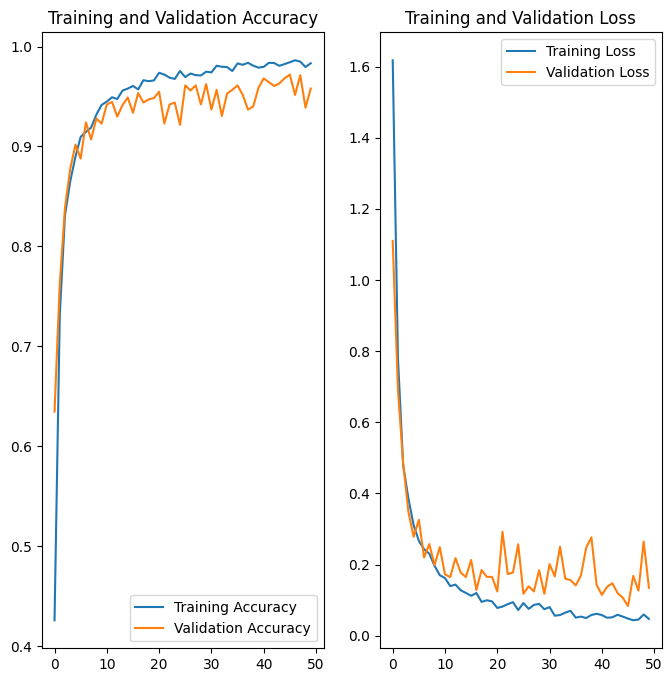

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

first image to predict


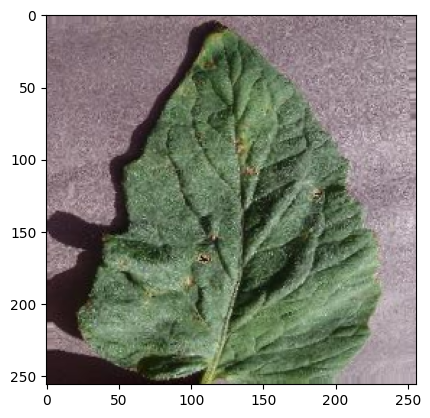

actual label: Tomato__Target_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 981ms/step
predicted labels: ['Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Late_blight', 'Tomato_Late_blight', 'Tomato_Septoria_leaf_spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_Septoria_leaf_spot', 'Tomato_Septoria_leaf_spot', 'Tomato_Early_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato_healthy', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato_Bacterial_spot', 'Tomato_Bacterial_spot', 'Tomato_Bacterial_spot', 'Tomato_healthy', 'Tomato_Late_blight', 'Tomato_Late_blight', 'Tomato_healthy', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato_Late_blight', 'Tomato__Tomato_YellowLeaf__Curl_Virus']


In [24]:
import numpy as np

for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])

    print("first image to predict")
    plt.imshow(first_image)
    plt.show()  # Show the image
    print("actual label:", class_names[first_label])

    batch_predictions = model.predict(image_batch)
    predicted_labels = [np.argmax(pred) for pred in batch_predictions]
    print("predicted labels:", [class_names[pred_label] for pred_label in predicted_labels])

    break

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 625ms/step


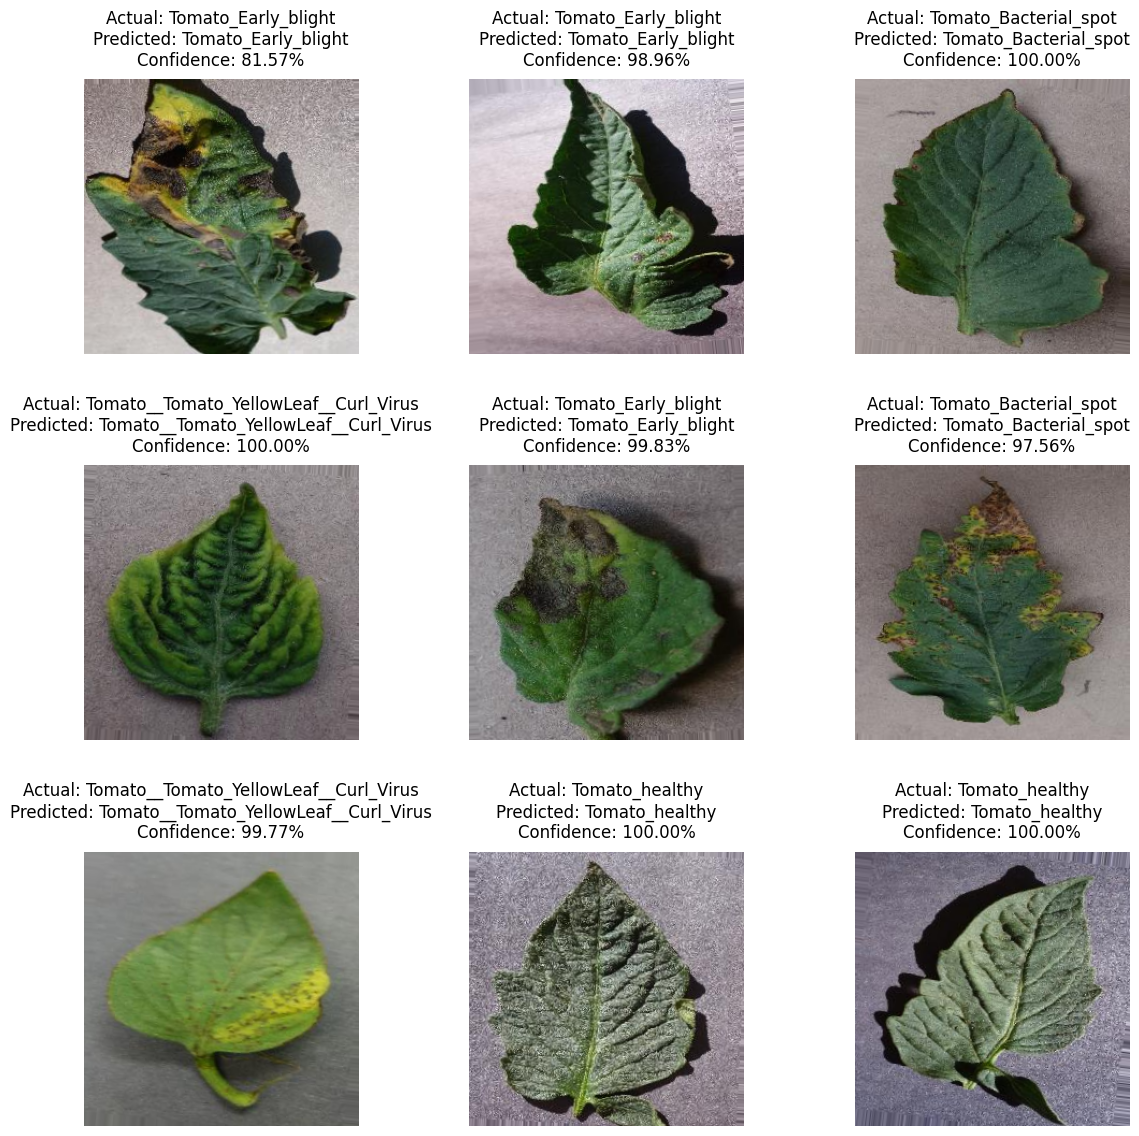

In [25]:
import random

# Assuming test_generator is your data generator
fig, axs = plt.subplots(3, 3, figsize=(12, 12))

# Get the total number of batches
num_batches = len(test_generator)

# Select a random batch index
random_batch_index = random.randint(0, num_batches)

# Load the random batch
image_batch, label_batch = test_generator[random_batch_index]

# Predictions for the random batch
batch_predictions = model.predict(image_batch)

# Randomly select 9 images from the batch
random_indices = random.sample(range(len(image_batch)), 9)

for i, index in enumerate(random_indices):
    row = i // 3
    col = i % 3

    image = image_batch[index]
    label = int(label_batch[index])
    prediction = np.argmax(batch_predictions[index])
    # Confidence percentage
    confidence = np.max(batch_predictions[index]) * 100

    axs[row, col].imshow(image)
    axs[row, col].set_title(f"Actual: {class_names[label]}\nPredicted: {class_names[prediction]}\nConfidence: {confidence:.2f}%", pad=10)
    axs[row, col].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


### Saving the Model

In [36]:
import os
from datetime import datetime

# Create directories if they don't exist
keras_directory = "model/keras"
h5_directory = "model/h5"

os.makedirs(keras_directory, exist_ok=True)
os.makedirs(h5_directory, exist_ok=True)

now = datetime.now()
date_time_str = now.strftime("%Y-%m-%d_%H-%M-%S")

keras_file_name = os.path.join(keras_directory, f"tomato_{date_time_str}.keras")
h5_file_name = os.path.join(h5_directory, f"tomato_{date_time_str}.h5")

model.save(keras_file_name)
print("Model (keras) saved with file name:", keras_file_name)

model.save(h5_file_name)
print("Model (h5) saved with file name:", h5_file_name)

Model (keras) saved with file name: model/keras\tomato_2024-05-01_00-32-17.keras
Model (h5) saved with file name: model/h5\tomato_2024-05-01_00-32-17.h5
